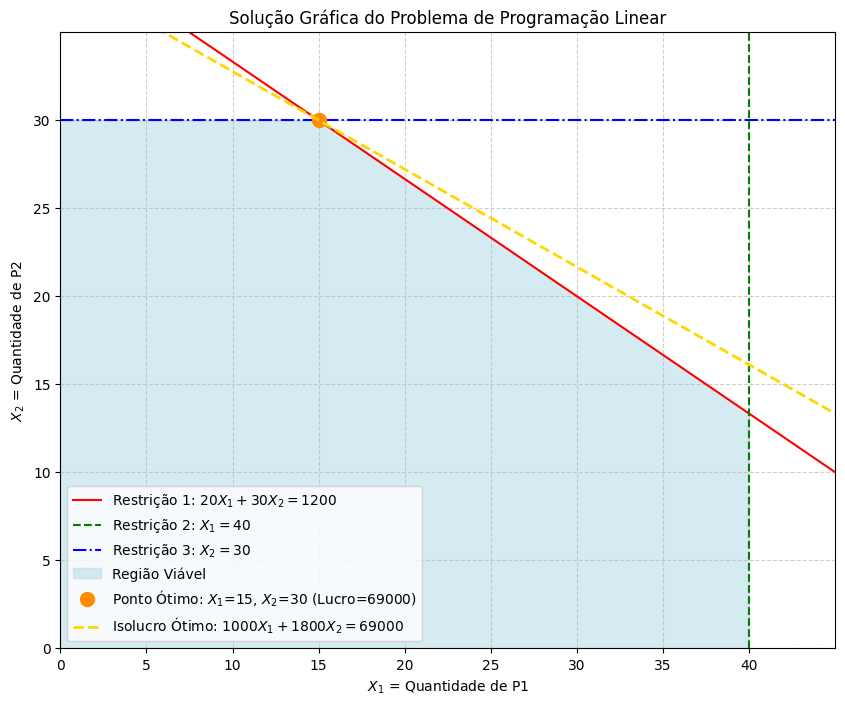

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Definição das Restrições
# O problema é: Max L = 1000*X1 + 1800*X2
# Sujeito a:
# (R1) 20*X1 + 30*X2 <= 1200  => X2 <= (1200 - 20*X1) / 30
# (R2) X1 <= 40
# (R3) X2 <= 30
# (R4, R5) X1 >= 0, X2 >= 0

# Cria um array de valores para X1 (de 0 a 40, limite da demanda P1)
# X1 vai de 0 a 60, para garantir que o corte da restrição de tempo seja visível
X1 = np.linspace(0, 60, 500)

# Define as funções das restrições (expressas em termos de X2)

# Restrição 1 (Tempo): X2 <= (1200 - 20*X1) / 30
R1_tempo = (1200 - 20 * X1) / 30

# Restrição 2 (Demanda P1): X1 <= 40
# Esta é uma linha vertical, então usaremos o limite diretamente no plot

# Restrição 3 (Demanda P2): X2 <= 30
R3_demanda_P2 = 30 * np.ones_like(X1)

# 2. Configuração do Gráfico
plt.figure(figsize=(10, 8))
plt.title('Solução Gráfica do Problema de Programação Linear')
plt.xlabel('$X_1$ = Quantidade de P1')
plt.ylabel('$X_2$ = Quantidade de P2')
plt.grid(True, linestyle='--', alpha=0.6)

# 3. Plotagem das Linhas das Restrições
# Plot R1 (Tempo)
plt.plot(X1, R1_tempo, label='Restrição 1: $20X_1 + 30X_2 = 1200$', color='red')

# Plot R2 (Demanda P1): Linha vertical em X1=40
plt.axvline(x=40, label='Restrição 2: $X_1 = 40$', color='green', linestyle='--')

# Plot R3 (Demanda P2): Linha horizontal em X2=30
plt.axhline(y=30, label='Restrição 3: $X_2 = 30$', color='blue', linestyle='-.')

# 4. Determinação da Região Viável (Interseção das restrições)
# A região viável é o MÍNIMO de todas as restrições superiores (<=)

# 1. Considera o limite da Demanda P2 (X2=30)
y_max_demanda_P2 = np.minimum(R3_demanda_P2, R1_tempo)

# 2. Limita pela Demanda P1 (X1=40)
# Apenas a região onde X1 <= 40 é válida.
X1_viable = X1[X1 <= 40]
R1_viable = R1_tempo[X1 <= 40]
R3_viable = R3_demanda_P2[X1 <= 40]

# O limite superior da região viável
y_upper_limit = np.minimum(R3_viable, R1_viable)

# Preenchimento da Região Viável
plt.fill_between(X1_viable, 0, y_upper_limit, where=y_upper_limit > 0,
                 color='lightblue', alpha=0.5, label='Região Viável')

# 5. Plotagem do Ponto Ótimo
# Solução encontrada anteriormente: X1=15, X2=30, Lucro=69000
X1_opt = 15
X2_opt = 30
Lucro_opt = 69000

# Plot do Ponto Ótimo
plt.plot(X1_opt, X2_opt, 'o', color='darkorange', markersize=10,
         label=f'Ponto Ótimo: $X_1$={X1_opt}, $X_2$={X2_opt} (Lucro={Lucro_opt})')

# 6. Plotagem da Isocusto Ótima
# A linha Isocusto (1000*X1 + 1800*X2 = 69000)
# X2 = (69000 - 1000*X1) / 1800
X2_isocusto = (Lucro_opt - 1000 * X1) / 1800
plt.plot(X1, X2_isocusto, color='gold', linestyle='--', linewidth=2,
         label=f'Isolucro Ótimo: $1000X_1 + 1800X_2 = 69000$')


# 7. Finalização do Gráfico
# Ajusta os limites para focar na região relevante (como no seu slide)
plt.xlim(0, 45) # X1 vai até 40 no máximo, mas usamos 45 para visualização
plt.ylim(0, 35) # X2 vai até 30 no máximo, mas usamos 35 para visualização
plt.xticks(np.arange(0, 41, 5))
plt.yticks(np.arange(0, 31, 5))
plt.legend()
plt.show()